## Project 3

RBFOX2 is a human splicing factor.  It regulates the inclusion of exons through binding to specific RNA sites near alternative exons.  Below is a "splicing map" from Jangi et al (2014) for RBFOX2.  It combines RBP/RNA interaction data (CLIP-seq) with data about which exons are more/less included upon RBFOX2 knockdown.

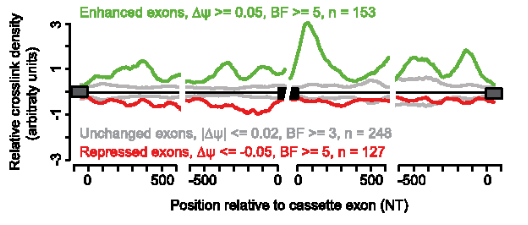

As you can see, exons whose inclusion is enhanced (green line) tend to have RBFOX2 bound in the intron immediately downstream of the exon.  This indicates that RBFOX2 likely promotes inclusion of this exon by binding in the downstream intron.  

We might wonder how RBFOX2 knows to bind these specific introns.  We know that RNA-binding proteins like RBFOX2 often recognize their RNA targets through interaction with short RNA sequences (kmers).  Perhaps, then, RBFOX2 is recognizing a specific kmer that is enriched in the introns downstream of the exons it enhances.  Can we figure out what this kmer (or kmers) might be?

One way to do this would be by comparing two groups of sequences.  One group could be sequences from introns downstream of exons whose inclusion is enhanced by RBFOX2.  Think of these as the "affected" exons.  The other group could be sequences from the same downstream intron, but only after exons whose inclusion is unaffected by RBFOX2. Think of these as the "control" exons.  

*As an aside, we know which exons are enhanced by RBFOX2 and which are not by analyzing splicing transcriptome-wide in cells that we treated with either RBFOX2 siRNA or control siRNA.*

We would expect that the kmer that RBFOX2 is recognizing would be enriched in introns downstream of "affected" exons relative to the introns downstream of "control" exons.  It just so happens that we have made fasta files containing intronic sequences downstream of both exon classes.  You can download them from the links below.

[Enhanced](https://github.com/srinivasramachandran/Anschutz_python/blob/master/DownstreamIntron.Enhanced.fasta)

[Control](https://github.com/srinivasramachandran/Anschutz_python/blob/master/DownstreamIntron.Control.fasta)

> For the splicing afficionados out there, these files are actually of the last 50 nt of each exon and the first 150 nt of the downstream intron.

What we would like to do is write code that compares the sequence content of the two files and identifies 6-mers that are enriched in the "Enhanced" file relative to the "control" file.  This can be done with the following approach:

1.  Go through each file and count the number of occurences of each 6-mer.  This might be best stored as a dictionary of the form {kmer : number of occurences}.
2.  Calculate an enrichment for each for each kmer in the affected relative to control by dividing the frequency of the kmer in the affected sequences to its frequency in control sequences.  Remember that the frequency of a kmer is that number of occurences of that kmer divided by the number of occurences of all kmers.  Frequencies must be between 0 and 1.
3.  Calculate the statistical significance of that enrichment with a Fisher's exact test.  This can be done by importing the fisher_exact function from the scipy.stats module.  See the [documentation](http://lagrange.univ-lyon1.fr/docs/scipy/0.17.1/generated/scipy.stats.fisher_exact.html) for fisher_exact for help.
4.  Correct your Fisher's exact p-values for multiple hypothesis testing with a Bonferroni correction.  Very simply, multiply your original pvalue from fisher_exact by the number of kmers you are considering (there are 4096 possible 6mers).
5. Sort kmers by their corrected pvalues.
6. Write a file with the following columns for every kmer:
      kmer, enrichment, uncorrected pvalue, corrected pvalue
      

Perhaps the best way to tackle this would be to write an independent function for each one of the numbered tasks above.  This keeps your code neat and readable.